In [1]:
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset
from itertools import product, chain
import importlib

import trainer, data, models
from data import fashion_mnist
from trainer import Trainer, Hyperparameters
from models import SoftmaxRegression

/Users/ralph/.venvs/d2dl/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
importlib.reload(trainer)
importlib.reload(data)
importlib.reload(models)

<module 'models' from '/Users/ralph/projects/d2dl/models.py'>

In [3]:
fashion_mnist_dataset = fashion_mnist()

In [4]:
num_classes = len(fashion_mnist_dataset.train.classes)
fashion_mnist_dataset.train

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: datasets/fashion_mnist
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=(28, 28), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
               Lambda()
           )

In [5]:
sample_train_item = fashion_mnist_dataset.train.data[0]

In [6]:
provider = lambda hyperparams: Trainer(
    model=SoftmaxRegression(
        input_d=sample_train_item.shape[0] * sample_train_item.shape[1],
        output_d=len(fashion_mnist_dataset.train.classes)
    ),
    dataset=fashion_mnist_dataset,
    loss=nn.CrossEntropyLoss,
    opt=torch.optim.SGD,
    hyperparameters=hyperparams
)

In [7]:
trainer = provider(Hyperparameters(
    opt=dict(
        lr=1e-3
    ),
    general=dict(
        num_epochs = 25,
        batch_size = 256
    )
))

In [8]:
train_result = trainer.train(10)

<Axes: >

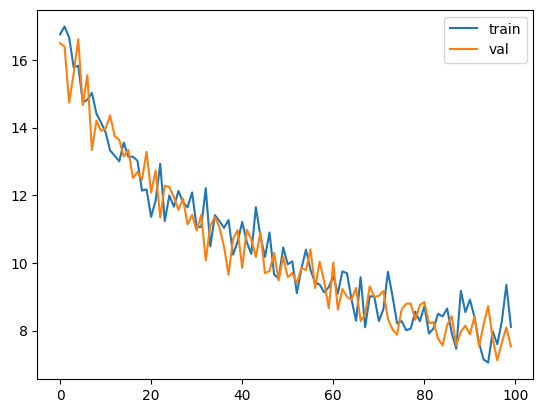

In [9]:
train_result.plot()